In [46]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *
from output_xfoil import *

In [25]:
#theoretical_bt = [21.11, 23.9, 24.65, 24.11, 22.78, 21.01, 19, 17.06, 15.33, 13.82, 12.51, 11.36, 10.27, 9.32, 8.36, 7.27, 6.15, 5.04] 
#theoretical_cl = [0.109, 0.132, 0.156, 0.176, 0.193, 0.206, 0.216, 0.223, 0.226, 0.225, 0.219, 0.21, 0.197, 0.179, 0.157, 0.13, 0.087, 0.042]

theoretical_bt = [23.9, 24.65, 24.11, 22.78, 21.01, 19, 17.06, 15.33, 13.82, 12.51, 11.36, 10.27, 9.32, 8.36, 7.27, 6.15, 5.04] 
theoretical_cl = [0.132, 0.156, 0.176, 0.193, 0.206, 0.216, 0.223, 0.226, 0.225, 0.219, 0.21, 0.197, 0.179, 0.157, 0.13, 0.087, 0.042]

In [26]:
len(theoretical_bt)

17

In [27]:
propeller = pd.read_csv('propeller_data.csv')

In [28]:
#positions = [10, 20, 30, 40, 50, 60, 70, 80, 90]
positions = [40, 50]
rpm = 6500 
#positions = np.linspace(20, 100, 17).tolist()
print(positions)

[40, 50]


In [29]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dlowest, dhighest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

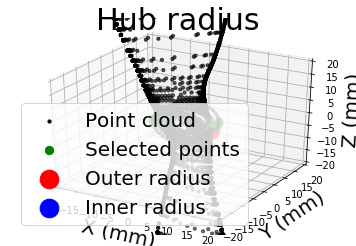

6.540994719831005


In [30]:
hub_radius = param_hub_radius(propeller_coords)
print(hub_radius)

In [31]:
planes = get_planes_xfoil(upper_blade, dmiddle, dhighest, vect_length, positions) #get equations of planes for projection

In [32]:
all_plane_points = get_points(upper_blade, planes)                   #get points used for each projection

Points of plane 1
Points of plane 2


In [33]:
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

In [34]:
x_list, y_right_list, y_left_list, rm = get_generated_points_xfoil(right_param, left_param, right_pts, left_pts)

plot_interpolation_both_sides_no_generation(right_param[1], right_pts[1], left_param[1], left_pts[1])

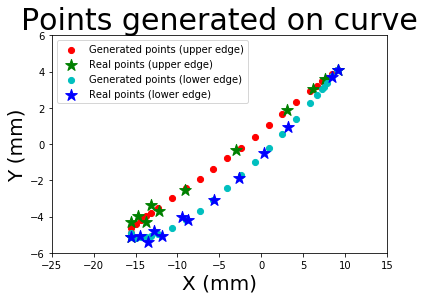

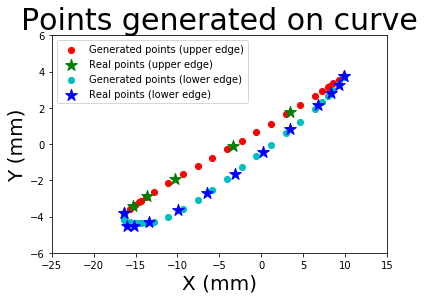

In [35]:
for i in range(len(all_plane_points) - rm):
    plot_interpolation_both_sides( right_pts[i], left_pts[i], x_list[i], y_right_list[i], y_left_list[i], i )

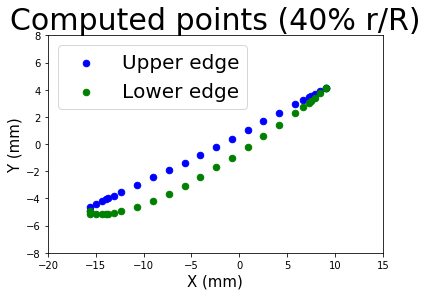

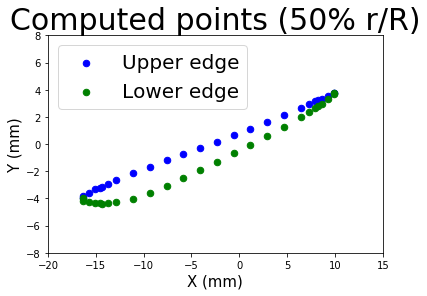

In [36]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil( x_list[i], y_right_list[i], y_left_list[i], positions[i] )

In [37]:
for i in range(len(all_plane_points) - rm):
    print(positions[i])

40
50


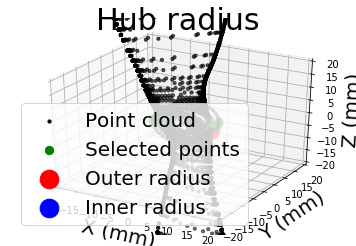

6.540994719831005
126.80676910381526
2


In [38]:
#blade_twist = xfoil_get_blade_twist(x, y_right_list, y_left_list)
hub_radius = param_hub_radius(propeller_coords)
print(hub_radius)
tip_radius = get_tip_radius(propeller_coords)
print(tip_radius)
blade_twist = get_blade_twist(x_list, y_right_list, y_left_list)
print(len(blade_twist))
chord_length = get_chord_length(x_list, y_right_list, y_left_list)
#print(chord_length)
chord_length_normalized = [x/tip_radius for x in chord_length]
#print(chord_length_normalized)

#positions = np.linspace(20, 95, 16).tolist()

In [ ]:
def output_param(positions, tip_radius, hub_radius, chord_length_normalized, blade_twist, filename):
    df = pd.DataFrame({'Percentage': positions, 'Chord_Length': chord_length,  'Blade_twist': blade_twist}) # 'Hub radius': hub_radius, 'Tip radius': tip_radius})
    df.to_csv(filename)
    return df

In [ ]:
output_param(positions, tip_radius, hub_radius, chord_length, blade_twist, 'parameters.csv')

In [ ]:
radius  = get_radius(positions, tip_radius)
reynold = get_reynold_numbers(radius, rpm, chord_length)
mach    = get_mach_numbers(radius, rpm)

In [ ]:
def output_reynold_mach(positions, radius, reynold, mach, filename):
    df = pd.DataFrame({'Percentage': positions, 'Radius': radius,  'Reynold': reynold, 'Mach':mach})
    df.to_csv(filename)
    return df

In [ ]:
df = output_reynold_mach(positions, radius, reynold, mach, "XFOIL6.99/X-Foil_parameters.csv")

In [ ]:
df

In [39]:
x_r_rotated, y_r_rotated, x_l_rotated, y_l_rotated = align_aerofoil(x_list, y_right_list, y_left_list, blade_twist)

In [40]:
y_r_flipped, y_l_flipped = mirror_aerofoil(y_r_rotated, y_l_rotated)

In [41]:
for i in range(len(all_plane_points) - rm):
    print(positions[i])

40
50


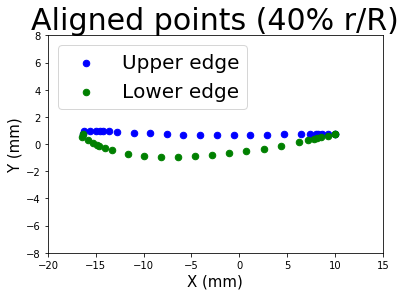

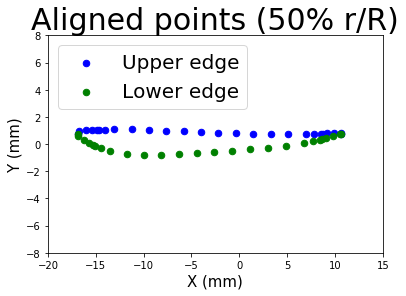

In [42]:
for i in range(len(all_plane_points) - rm):
    plot_xfoil_aligned(x_r_rotated[i], y_r_rotated[i], x_l_rotated[i], y_l_rotated[i], positions[i])

    #plot_xfoil_scaled( x_r_rotated[i], y_r_rotated[i], x_l_rotated[i], y_l_rotated[i], positions[i]) 

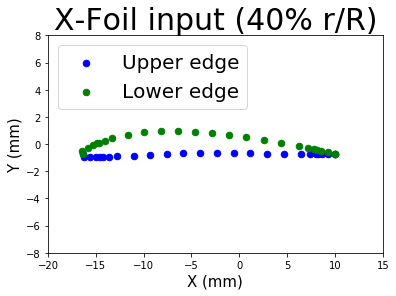

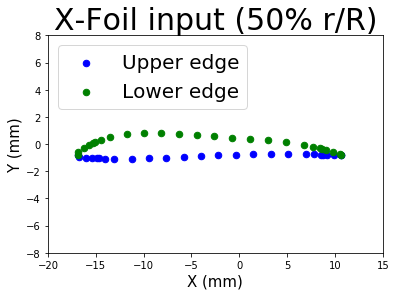

In [49]:
#right est en bas mtn
for i in range(len(all_plane_points) - rm):
    plot_xfoil_mirror(x_r_rotated[i], y_r_flipped[i], x_l_rotated[i], y_l_flipped[i], positions[i])

In [44]:
for i in range(len(all_plane_points) - rm):
    xfoil_input_data(x_r_rotated[i], y_r_flipped[i], x_l_rotated[i], y_l_flipped[i], positions[i])

## Other stuff for report

In [ ]:
# Appendice B
for i in range(len(all_plane_points) - rm):
    plot_interpolation_param(right_pts[i], left_pts[i], x_list[i], y_right_list[i], y_left_list[i], str(positions[i]), chord_length, blade_twist, i)

#plot_blade_twist_comparison(blade_twist, theoretical_bt[:-1], positions[:-1])

error_blade_twist = param_mean_error(blade_twist, theoretical_bt[:-1])
print("Mean error blade twist " + str(error_blade_twist))

rmse_blade_twist = param_RMSE(blade_twist, theoretical_bt[:-1])
print("RMSE blade twist " + str(rmse_blade_twist))

#plot_chord_length_comparison(chord_length_normalized, theoretical_cl[:-1], positions[:-1])

error_chord_length = param_mean_error(chord_length_normalized, theoretical_cl[:-1])
print("Mean error chord length " + str(error_chord_length))

rmse_chord_length = param_RMSE(chord_length_normalized, theoretical_cl[:-1])
print("RMSE chord length " + str(rmse_chord_length))